In [2]:
# Dependencies
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats


In [3]:
# Import the covid-19 dataset 
csv_path = ('Resources/owid-covid-data.csv')
covid_data_df = pd.read_csv(csv_path)
covid_data_df.head(1000)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,3/13/2020,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,3/19/2020,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,3/20/2020,4.0,2.0,0.286,0.0,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,3/21/2020,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,3/22/2020,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ALB,Europe,Albania,8/6/2020,5889.0,139.0,112.000,182.0,6.0,4.571,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
996,ALB,Europe,Albania,8/7/2020,6016.0,127.0,117.000,188.0,6.0,4.857,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
997,ALB,Europe,Albania,8/8/2020,6151.0,135.0,125.000,189.0,1.0,4.571,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
998,ALB,Europe,Albania,8/9/2020,6275.0,124.0,125.571,193.0,4.0,4.571,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785


In [4]:
#Drop cells containing NaN
covid_data_clean = covid_data_df.dropna()
covid_data_clean.head()
                               

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
4086,BGD,Asia,Bangladesh,3/17/2020,5.0,2.0,0.286,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4087,BGD,Asia,Bangladesh,3/18/2020,8.0,3.0,0.714,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4088,BGD,Asia,Bangladesh,3/19/2020,10.0,2.0,1.000,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4089,BGD,Asia,Bangladesh,3/20/2020,10.0,0.0,1.000,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4090,BGD,Asia,Bangladesh,3/21/2020,17.0,7.0,2.000,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608


In [5]:
#Get Total for the following:
#Total # of Cases for North America
total_cases_na = covid_data_clean["new_cases"].sum()
total_cases_na
#Total # of Cases for Africa 
#Total # of Deaths for North America 
#Total # of Death for Africa
#Create a pie-chart to show the difference between the two continent 

7914566.0

In [6]:
covid_data_clean_bd = covid_data_clean.loc[covid_data_clean['location'] == 'Bangladesh']
#covid_data_clean_bd = covid_data_clean_bd.loc([['location'] == 'Bangladesh'])["new_cases"].sum()
covid_data_clean_bd

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
4086,BGD,Asia,Bangladesh,3/17/2020,5.0,2.0,0.286,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4087,BGD,Asia,Bangladesh,3/18/2020,8.0,3.0,0.714,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4088,BGD,Asia,Bangladesh,3/19/2020,10.0,2.0,1.000,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4089,BGD,Asia,Bangladesh,3/20/2020,10.0,0.0,1.000,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4090,BGD,Asia,Bangladesh,3/21/2020,17.0,7.0,2.000,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,BGD,Asia,Bangladesh,9/9/2020,329251.0,1892.0,2043.571,4552.0,36.0,33.714,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4263,BGD,Asia,Bangladesh,9/10/2020,331078.0,1827.0,1935.714,4593.0,41.0,34.571,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4264,BGD,Asia,Bangladesh,9/11/2020,332970.0,1892.0,1897.714,4634.0,41.0,35.857,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
4265,BGD,Asia,Bangladesh,9/12/2020,334762.0,1792.0,1878.143,4668.0,34.0,36.571,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608


In [7]:
# Get total # of cases by continent
total_cases_group = covid_data_clean.groupby(["continent"])["new_cases"].sum()
total_cases_group = pd.DataFrame(total_cases_group)
total_cases_group.head()


,new_cases
continent,
Africa,843936.0
Asia,6211940.0
North America,825177.0
South America,33513.0


In [8]:
# Get total # of death by continent
total_death_group = covid_data_clean.groupby(["continent"])["new_deaths"].sum()
total_death_group = pd.DataFrame(total_death_group)
total_death_group


,new_deaths
continent,
Africa,18797.0
Asia,104566.0
North America,76218.0
South America,659.0


In [9]:
# merge dataframe of total cases and total death in each continent
#
merge_cases_df = pd.merge(total_cases_group,total_death_group, how="inner",on = "continent")
merge_cases_df.head()


,new_cases,new_deaths
continent,,
Africa,843936.0,18797.0
Asia,6211940.0,104566.0
North America,825177.0,76218.0
South America,33513.0,659.0


In [10]:
# Create dataframe for "gdp_per_capita" per country
#
covid_data_clean_df = pd.DataFrame(covid_data_clean)
covid_data_clean_df = covid_data_clean_df.sort_values('location', ascending=True)
covid_data_clean_df = covid_data_clean_df.drop_duplicates(subset='location', keep='first')
df_gdp = covid_data_clean_df[['location','gdp_per_capita']]
df_gdp

,location,gdp_per_capita
4086,Bangladesh,3523.984
12034,Dominican Republic,14600.861
37748,El Salvador,7292.458
13986,Ethiopia,1729.927
16218,Ghana,4227.630
20110,India,6426.674
19680,Indonesia,11188.744
22875,Kazakhstan,24055.588
23073,Kenya,2993.028
30413,Malawi,1095.042


In [11]:
# Get total # of cases by continent
# group all the cases by continent
total_new_cases_groupby_cont = covid_data_clean.groupby(["continent"])["new_cases"].sum()

# group all deaths by continent
total_new_death_groupby_cont = covid_data_clean.groupby(["continent"])["new_deaths"].sum()

# merge dataframe of total cases and total death in each continent
#
total_merge_cases_by_continent = pd.merge(total_new_cases_groupby_cont, total_new_death_groupby_cont, 
                          how="inner", on = "continent")

print ("Total number of COVID-19: new cases and new deaths by Continent" )
total_merge_cases_by_continent.head()


Total number of COVID-19: new cases and new deaths by Continent


,new_cases,new_deaths
continent,,
Africa,843936.0,18797.0
Asia,6211940.0,104566.0
North America,825177.0,76218.0
South America,33513.0,659.0


In [12]:
# Get total # of cases by country

new_cases_group_country = covid_data_clean.groupby(['location'])["new_cases"].sum()
new_death_group_country = covid_data_clean.groupby(['location'])["new_deaths"].sum()

total_cases_group_country = pd.merge(new_cases_group_country, new_death_group_country, 
                                     how="inner", on = "location")

total_cases_df_gdp = pd.merge(total_cases_group_country, df_gdp, how="inner", on = "location")

print ("Total number of COVID-19: new cases and new deaths by Country" )

#total_cases_group_country.head(200)

total_cases_df_gdp


Total number of COVID-19: new cases and new deaths by Country


,location,new_cases,new_deaths,gdp_per_capita
0,Bangladesh,336041.0,4702.0,3523.984
1,Dominican Republic,100424.0,1930.0,14600.861
2,El Salvador,27090.0,795.0,7292.458
3,Ethiopia,68804.0,1096.0,1729.927
4,Ghana,39347.0,260.0,4227.630
5,India,5208029.0,84183.0,6426.674
6,Indonesia,168697.0,6801.0,11188.744
7,Kazakhstan,125828.0,2006.0,24055.588
8,Kenya,30183.0,517.0,2993.028
9,Malawi,4938.0,151.0,1095.042


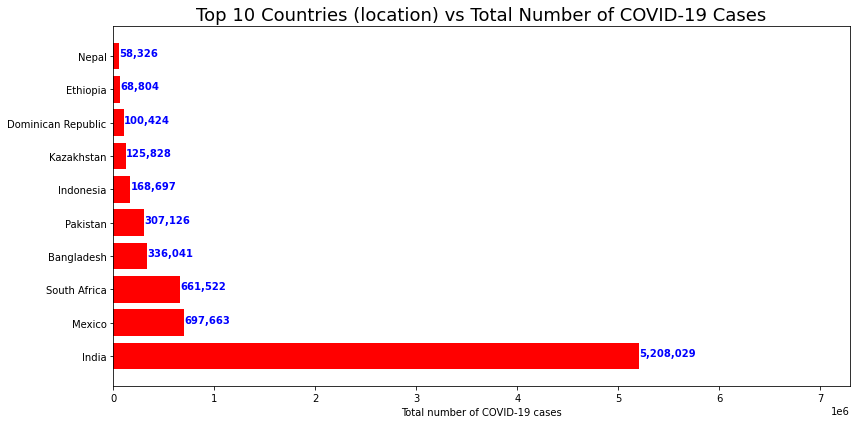

In [16]:
# Plot total number of COVID-19 cases in top 10 countries 
#
# sorting data by top 10 countries that has highest # of cases 
sorted_by_cases_gdp = total_cases_df_gdp.sort_values(by='new_cases', ascending = False)

# get the data for plotting 
# get the data for plotting the top 10 movies by revenue

top_10_data_to_plot_df = sorted_by_cases_gdp[:10][['location','new_cases',
                                                   'new_deaths','gdp_per_capita']].reset_index()

total_cases_value = top_10_data_to_plot_df.new_cases
x_title_labels = top_10_data_to_plot_df.location

y_total_cases = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_total_cases, total_cases_value, align='center', height=0.8, color="red")

plt.yticks(y_total_cases, x_title_labels)
plt.xlim(0,np.max(total_cases_value)*1.4)
plt.xlabel('Total number of COVID-19 cases')
plt.title('Top 10 Countries (location) vs Total Number of COVID-19 Cases', fontsize = 18)

for i, v in enumerate(total_cases_value):
   plt.text(v + 0.5, i, str(('{:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()

# Save it
plt.savefig("To_10_Countries-COVID-19-Cases.png")

plt.show()

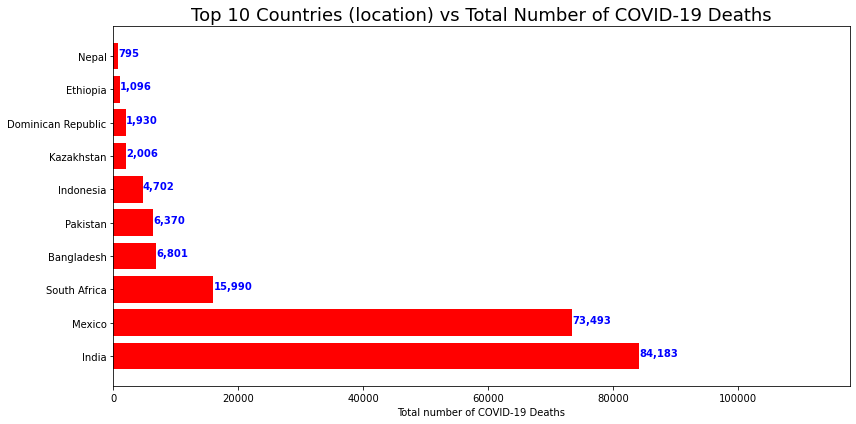

In [17]:
# Plot total number of COVID-19 deaths in top 10 countries 
#
# sorting data by top 10 countries that has highest # of daths
sorted_by_deaths_gdp = total_cases_df_gdp.sort_values(by='new_deaths', ascending = False)

# get the data for plotting 
# get the data for plotting the top 10 movies by revenue

top_10_death_data_to_plot_df = sorted_by_deaths_gdp[:10][['location','new_cases',
                                                   'new_deaths','gdp_per_capita']].reset_index()

total_death_value = top_10_death_data_to_plot_df.new_deaths
x_title_labels_death = top_10_death_data_to_plot_df.location

y_total_death = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_total_death, total_death_value, align='center', height=0.8, color="red")

plt.yticks(y_total_death, x_title_labels)
plt.xlim(0,np.max(total_death_value)*1.4)
plt.xlabel('Total number of COVID-19 Deaths')
plt.title('Top 10 Countries (location) vs Total Number of COVID-19 Deaths', fontsize = 18)

for i, v in enumerate(total_death_value):
   plt.text(v + 0.5, i, str(('{:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()

# Save it
plt.savefig("To_10_Countries-COVID-19-Deaths.png")

plt.show()

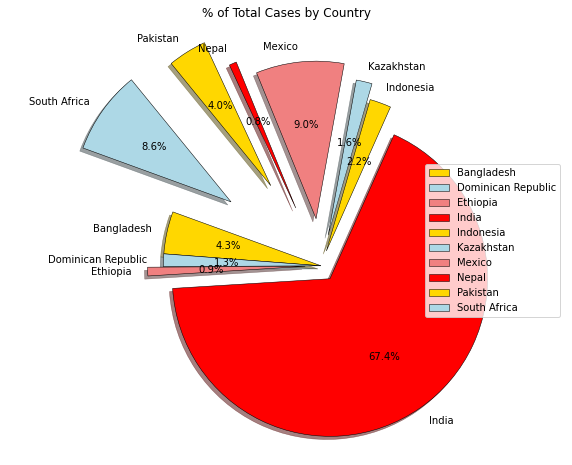

In [44]:
# Pie graph showing % of COVID-19 Cases per country
#
cases_count_sum = top_10_data_to_plot_df.groupby('location').sum()["new_cases"]

labels = cases_count_sum.index

plt.subplots(figsize = (10,8))

explode = (0, 0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7)

colors = ["gold", "lightblue", "lightcoral","red"]

plt.title('% of Total Cases by Country')
plt.axis('equal')

plt.pie(cases_count_sum, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",
        shadow=True, startangle=160, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.axis('equal')
plt.ylabel('')

plt.legend(loc="right")

plt.show()




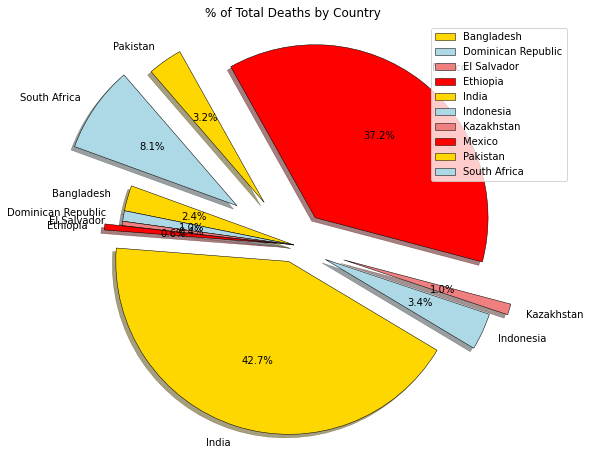

In [55]:
# Pie graph showing % of COVID-19 death per continent
#
deaths_count_sum = top_10_death_data_to_plot_df.groupby('location').sum()["new_deaths"]

labels = deaths_count_sum.index

plt.subplots(figsize = (10,8))

explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.2, 0.3, 0.4)

colors = ["gold", "lightblue", "lightcoral","red"]

plt.title('% of Total Deaths by Country')
plt.axis('equal')

plt.pie(deaths_count_sum, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%",
        shadow=True, startangle=160, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.axis('equal')
plt.ylabel('')

plt.legend(loc="best")

plt.show()


In [ ]:
# Daily covid-19 trend for a particular country


In [ ]:
#Correlation of # of covid-19 cases with population density 
#create graph 


In [ ]:
#Correlation of # of covid-19 cases with GDP per capita 
#create graph 



In [ ]:
#Correlation of total # of deaths with life expectancy 
#create graph 

In [ ]:
#Correlation of diabetes with total # of deaths 
#create graph 

In [ ]:
#How many hospital beds per thousand available for each continent? 
#create graph 